<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [29]:
o2mon = xr.open_mfdataset('../datasets/woa13/woa13-season/woa13_all_o*_01.nc',
                          autoclose=True, decode_times=False)
n2mon = xr.open_mfdataset('../datasets/woa13/woa13-season/woa13_all_n*_01.nc',
                          autoclose=True, decode_times=False)
turb = xr.open_dataset('./bay_merged_hourly.nc')
KT = turb['KT'].load()

/home/deepak/work/python/matplotlib/lib/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/home/deepak/work/python/matplotlib/lib/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/deepak/anaconda3/lib/python3.6/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


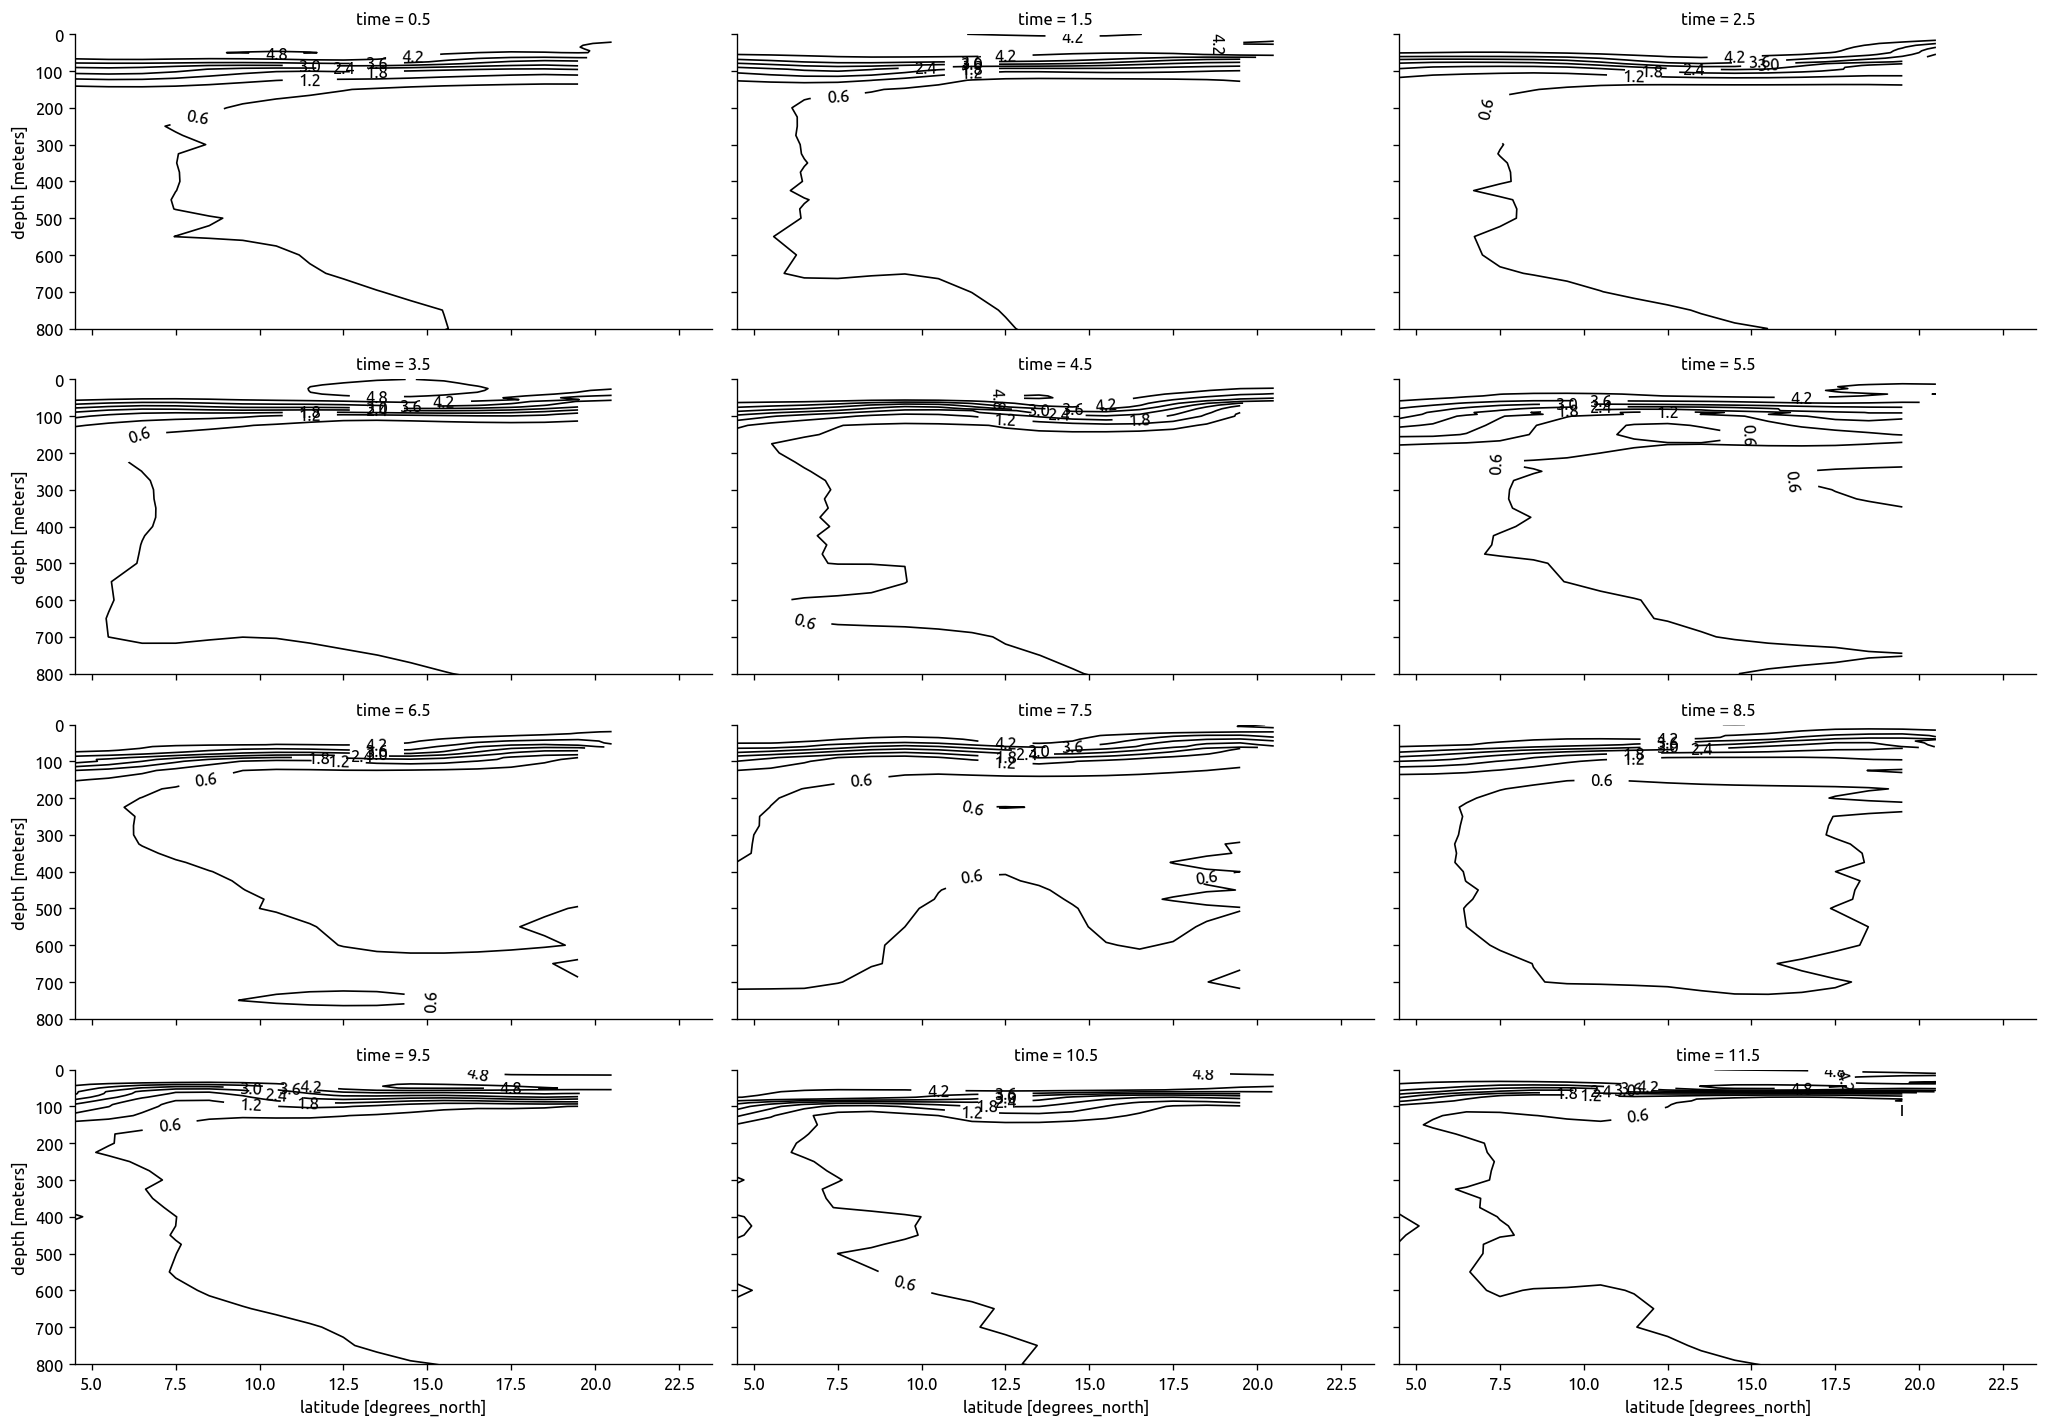

In [2]:
g = (o2mon.o_an.sel(**bay.region)
     .sel(lon=87.5)
     .dropna(dim='depth', how='all')
     .plot.contour(col='time', col_wrap=3, robust=True, aspect=1.8,
                   yincrease=False, levels=10,
                   colors='k', labels=True, clabel_kwargs={'fmt': '%.1f'}))
g.map(lambda: plt.ylim([800, 0]))

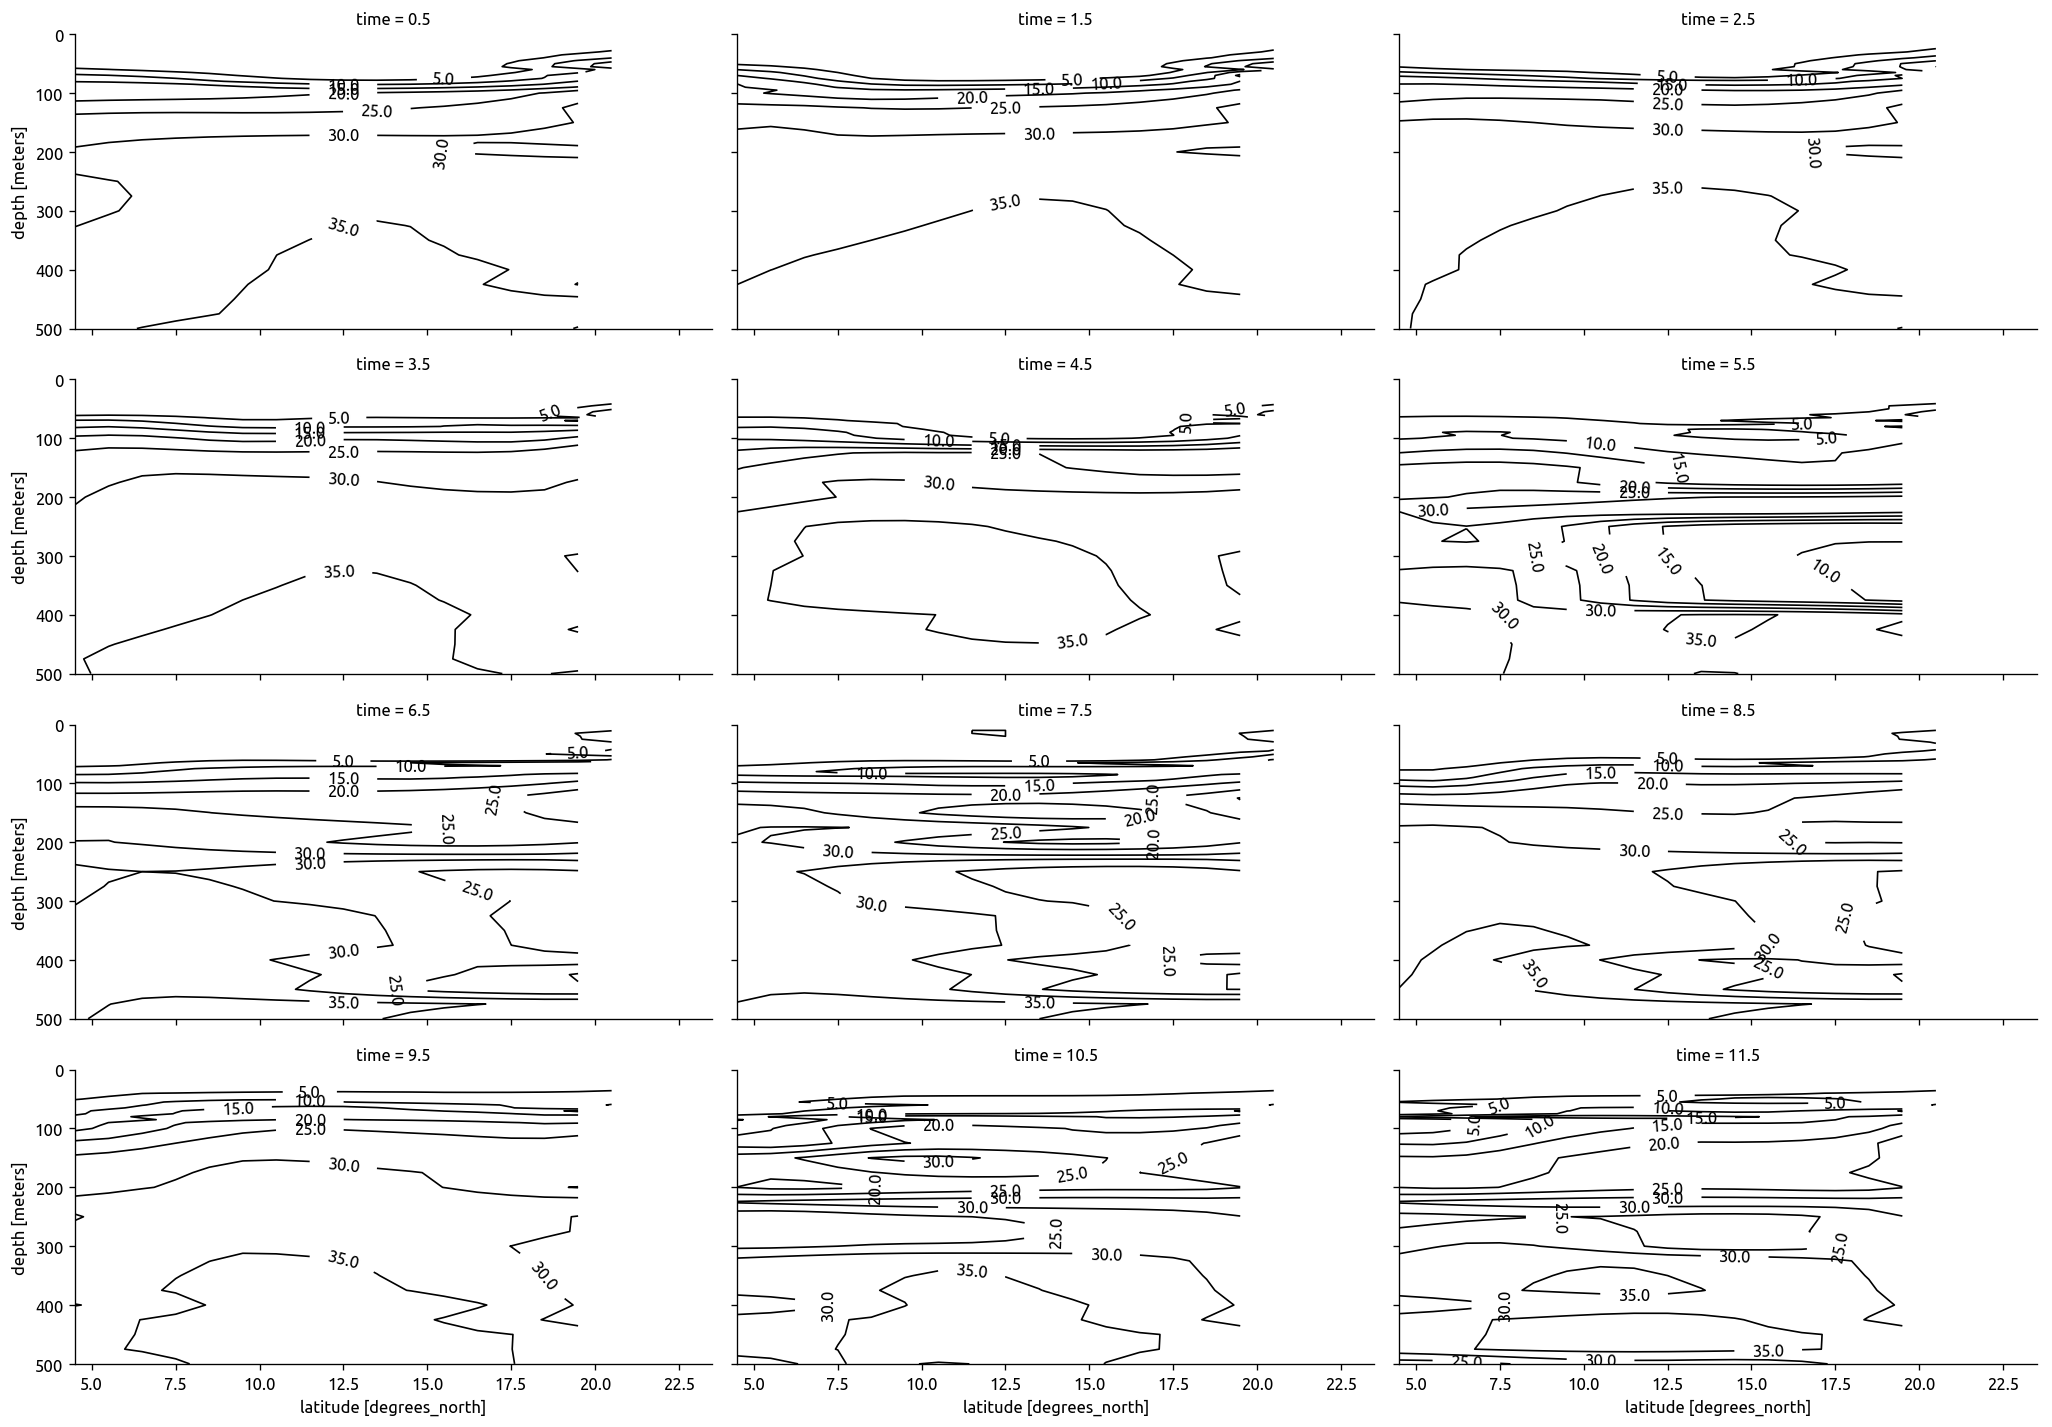

In [3]:
g = (n2mon.n_an.sel(**bay.region)
     .sel(lon=87.5)
     .dropna(dim='depth', how='all')
     .plot.contour(col='time', col_wrap=3, robust=True, aspect=1.8,
                   yincrease=False, levels=10,
                   colors='k', labels=True, clabel_kwargs={'fmt': '%.1f'}))
g.map(lambda: plt.ylim([500, 0]))

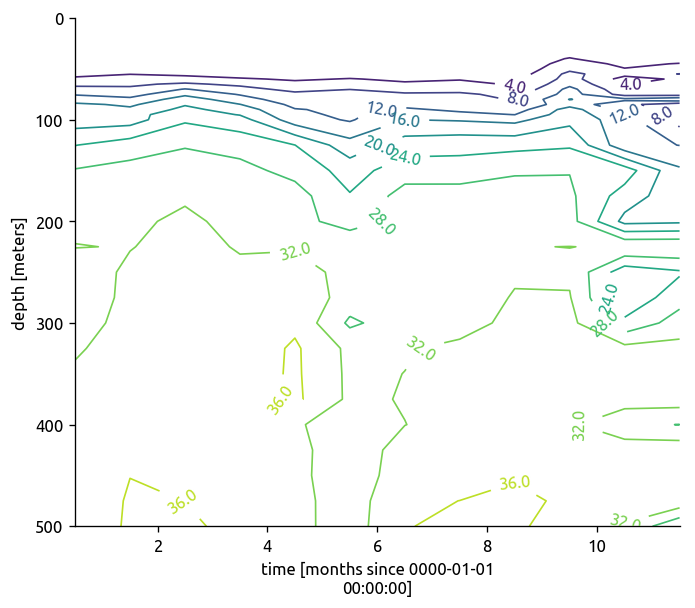

In [6]:
hdl = (n2mon.n_an.sel(**bay.ebob_region)
       .mean(['lat', 'lon'])
       .plot.contour(levels=12, x='time', yincrease=False,
                     labels=True, clabel_kwargs={'fmt': '%.1f'}))

In [28]:
KTebob = KT.sel(**bay.ebob_region).mean(['lat', 'lon']).dropna(dim='depth', how='all')
KTebob

zebob = turb['z']

/home/deepak/work/python/xarray/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'KT' (time: 19056, depth: 8)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * time     (time) datetime64[ns] 2013-11-29 ... 2016-01-31T23:00:00
  * depth    (depth) float64 28.0 48.0 55.0 56.0 75.0 76.0 84.0 104.0

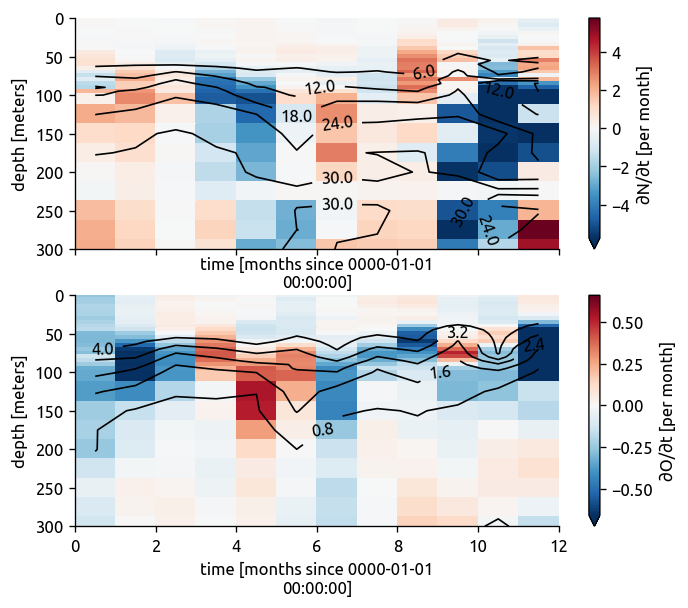

In [49]:
def plot_ddt(da, label):
    da_mean = (da.sel(**bay.ebob_region)
               .load()
               .mean(['lat', 'lon']))
    ((da_mean)
     .differentiate('time')
     .plot(x='time', yincrease=False, robust=True,
           cbar_kwargs={'label': label}))
    
    (da_mean.sel(depth=slice(0, 300))
     .plot.contour(x='time', colors='k', labels=True, ylim=[300, 0],
                  clabel_kwargs={'fmt': '%.1f'}))


f, ax = plt.subplots(2, 1, sharex=True, sharey=True)
plt.sca(ax[0])
plot_ddt(n2mon.n_an, '∂N/∂t [per month]')
plt.sca(ax[1])
plot_ddt(o2mon.o_an, '∂O/∂t [per month]')